Create a Personalized Compliment Agent

In [1]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [17]:
class AgentState(TypedDict):
    message : str

def personalized_compliment(state: AgentState) -> AgentState:
    """A personalized Compliment Agent"""
    state['message'] = f"{state['message']}, you're doing an amazing job learning langgraph"
    return state

def follow_up(state: AgentState):
    """Follow up compliment"""
    state['message'] = f"{state['message']}. Thank God for the gift of life"
    return state

In [22]:
graph = StateGraph(AgentState)

graph.add_node("compliment", personalized_compliment)
graph.add_node("followup", follow_up)

graph.set_entry_point("compliment")
graph.add_edge("compliment", "followup")
graph.set_finish_point("followup")  

app = graph.compile()

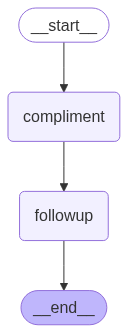

In [23]:
from IPython.display import Image,display

display(Image(app.get_graph().draw_mermaid_png()))

In [24]:
result = app.invoke({"message":"Daniel"})

In [25]:
result["message"]

"Daniel, you're doing an amazing job learning langgraph. Thank God for the gift of life"